In [1]:
import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [3]:
from scipy import sparse

In [4]:
from sklearn import preprocessing

In [5]:
full_preprocessed_train = pd.DataFrame(pd.read_csv(os.getcwd() + '/' + 'full_preprocessed_train.csv', sep=','))
full_preprocessed_val = pd.DataFrame(pd.read_csv(os.getcwd() + '/' + 'full_preprocessed_dev.csv', sep=','))

full_preprocessed_train = full_preprocessed_train.replace(np.nan, " ")
full_preprocessed_val = full_preprocessed_val.replace(np.nan, " ")

In [6]:
y_training_data = full_preprocessed_train['label']
y_val_val = full_preprocessed_val['label']

# LDA

In [7]:
lda_train = pd.DataFrame(pd.read_csv(os.getcwd() + '/' + 'lda_train.csv', sep=',', header=None))
lda_val = pd.DataFrame(pd.read_csv(os.getcwd() + '/' + 'lda_val.csv', sep=',', header=None))

In [8]:
lda_train.shape

(250874, 20)

In [9]:
lda_val.shape

(35918, 20)

### LDA without Additional Features (aka just vectorizer)

In [10]:
LDA_model = MultinomialNB()
LDA_model.fit(lda_train, y_training_data)
y_pred = LDA_model.predict(lda_val)
print("LDA with out additional features")
print("Accuracy:", accuracy_score(y_val_val, y_pred))
print("F1:", f1_score(y_val_val, y_pred, average='weighted'))

LDA with out additional features
Accuracy: 0.898435324906732
F1: 0.8503697992239174


### LDA with Additional Features (aka preprocessed + vectorizer)

In [11]:
num_feats = full_preprocessed_train[['user_id', 'prod_id', 'rating',  'length',
       'numbers', 'caps', 'num_sent', 'avg_words', 'perc_tot_user_reviews',
       'CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD',
       'NN', 'NNS', 'NNP', 'NNPS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR',
       'RBS', 'RP', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT',
       'WP', 'WP$', 'WRB']].values

In [12]:
val_num_feats = full_preprocessed_val[['user_id', 'prod_id', 'rating',  'length',
       'numbers', 'caps', 'num_sent', 'avg_words', 'perc_tot_user_reviews',
       'CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD',
       'NN', 'NNS', 'NNP', 'NNPS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR',
       'RBS', 'RP', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT',
       'WP', 'WP$', 'WRB']].values

In [13]:
LDA_X_training_data = sparse.hstack((num_feats, lda_train))
LDA_X_val_data = sparse.hstack((val_num_feats, lda_val))

In [14]:
LDA_X_training_data

<250874x64 sparse matrix of type '<class 'numpy.float64'>'
	with 9660326 stored elements in COOrdinate format>

In [15]:
LDA_X_val_data

<35918x64 sparse matrix of type '<class 'numpy.float64'>'
	with 1382973 stored elements in COOrdinate format>

In [16]:
LDA_model_add = MultinomialNB()
LDA_model_add.fit(LDA_X_training_data.toarray(), y_training_data)
y_pred_add = LDA_model_add.predict(LDA_X_val_data.toarray())
print("LDA with additional features")
print("Accuracy:", accuracy_score(y_val_val, y_pred_add))
print("F1:", f1_score(y_val_val, y_pred_add, average='weighted'))

LDA with additional features
Accuracy: 0.6213597639066764
F1: 0.6961307477408298


### LDA just vectorizer and normalized

In [17]:
type(LDA_X_training_data)

scipy.sparse.coo.coo_matrix

In [18]:
x = lda_train.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
lda_train_N = pd.DataFrame(x_scaled)

x = lda_val.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
lda_val_N = pd.DataFrame(x_scaled)

In [19]:
LDA_model = MultinomialNB()
LDA_model.fit(lda_train_N, y_training_data)
y_pred_norm = LDA_model.predict(lda_val_N)
print("LDA with out additional features and Normalized")
print("Accuracy:", accuracy_score(y_val_val, y_pred_norm))
print("F1:", f1_score(y_val_val, y_pred_norm, average='weighted'))

LDA with out additional features and Normalized
Accuracy: 0.898435324906732
F1: 0.8503697992239174


### Eval

In [20]:
from sklearn.metrics import roc_curve, auc

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
plt.rcParams['figure.figsize'] = 6,6

In [23]:
LDA_fpr, LDA_tpr, LDA_thresholds = roc_curve(y_val_val, y_pred)
LDA_auc = auc(LDA_fpr, LDA_tpr)

LDA_add_fpr, LDA_add_tpr, LDA_add_thresholds = roc_curve(y_val_val, y_pred_add)
LDA_add_auc = auc(LDA_add_fpr, LDA_add_tpr)

LDA_norm_fpr, LDA_norm_tpr, LDA_norm_thresholds = roc_curve(y_val_val, y_pred_norm)
LDA_norm_auc = auc(LDA_norm_fpr, LDA_norm_tpr)

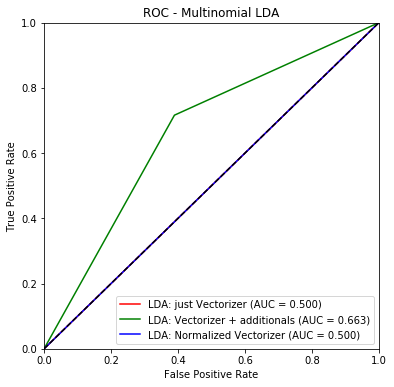

In [24]:
plt.plot(LDA_fpr, LDA_tpr, color = 'r', label = "LDA: just Vectorizer" + ' (AUC = %0.3f)' % LDA_auc)
plt.plot(LDA_add_fpr, LDA_add_tpr, color = 'g', label = "LDA: Vectorizer + additionals" + ' (AUC = %0.3f)' % LDA_add_auc)
plt.plot(LDA_norm_fpr, LDA_norm_tpr, color = 'b', label = "LDA: Normalized Vectorizer" + ' (AUC = %0.3f)' % LDA_norm_auc)


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Multinomial LDA')
plt.legend(loc="lower right")

### AP Eval

In [25]:
from sklearn.metrics import average_precision_score

print (" AP for LDA just Vectorizer")
print (average_precision_score(y_val_val, y_pred))
print (" \n")
print (" AP for LDA Vectorizer + additionals")
print (average_precision_score(y_val_val, y_pred_add))
print (" \n")
print (" AP for LDA NormalizedVectorizer")
print (average_precision_score(y_val_val, y_pred_norm))



 AP for LDA just Vectorizer
0.101564675093268
 

 AP for LDA Vectorizer + additionals
0.15212879966422246
 

 AP for LDA NormalizedVectorizer
0.101564675093268


# Doc2Vec

In [26]:
doc2vec_train = pd.DataFrame(pd.read_csv(os.getcwd() + '/' + 'dv_train.csv', sep=',', header=None))
doc2vec_val = pd.DataFrame(pd.read_csv(os.getcwd() + '/' + 'dv_val.csv', sep=',', header=None))

In [27]:
doc2vec_train.shape

(250874, 100)

In [28]:
doc2vec_val.shape

(35918, 100)

### Doc2Vec without Additional Features (aka just vectorizer)

In [29]:
dv_model = GaussianNB()
dv_model.fit(doc2vec_train, y_training_data)
y_pred = dv_model.predict(doc2vec_val)
print("DOC2VEC with out additional features")
print("Accuracy:", accuracy_score(y_val_val, y_pred))
print("F1:", f1_score(y_val_val, y_pred, average='weighted'))

DOC2VEC with out additional features
Accuracy: 0.4378584553705663
F1: 0.5258688605705018


### Doc2Vec with Additional Features (aka preprocessed + vectorizer)

In [30]:
DOC2VEC_X_training_data = sparse.hstack((num_feats, doc2vec_train))
DOC2VEC_X_val_data = sparse.hstack((val_num_feats, doc2vec_val))

In [31]:
DOC2VEC_X_training_data

<250874x144 sparse matrix of type '<class 'numpy.float64'>'
	with 29730246 stored elements in COOrdinate format>

In [32]:
DOC2VEC_X_val_data

<35918x144 sparse matrix of type '<class 'numpy.float64'>'
	with 4256413 stored elements in COOrdinate format>

In [33]:
dv_model = GaussianNB()
dv_model.fit(DOC2VEC_X_training_data.toarray(), y_training_data)
y_pred_add = dv_model.predict(DOC2VEC_X_val_data.toarray())
print("DOC2VEC with additional features")
print("Accuracy:", accuracy_score(y_val_val, y_pred_add))
print("F1:", f1_score(y_val_val, y_pred_add, average='weighted'))

DOC2VEC with additional features
Accuracy: 0.8977114538671418
F1: 0.850703980594319


### Doc2Vec just vectorizer and normalized

In [34]:
x = doc2vec_train.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
doc2vec_train_N = pd.DataFrame(x_scaled)

x = doc2vec_val.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
doc2vec_val_N = pd.DataFrame(x_scaled)

In [35]:
dv_model = GaussianNB()
dv_model.fit(doc2vec_train_N , y_training_data)
y_pred_norm = dv_model.predict(doc2vec_val_N)
print("DOC2VEC with out additional features")
print("Accuracy:", accuracy_score(y_val_val, y_pred_norm))
print("F1:", f1_score(y_val_val, y_pred_norm, average='weighted'))

DOC2VEC with out additional features
Accuracy: 0.898435324906732
F1: 0.8503697992239174


### Eval

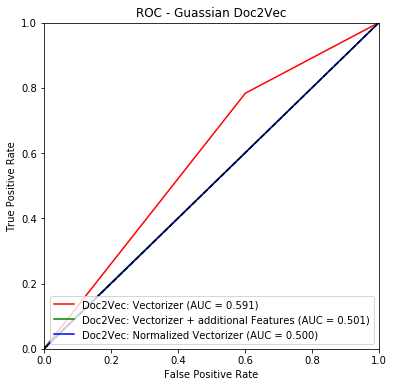

In [36]:
dv_fpr, dv_tpr, dv_thresholds = roc_curve(y_val_val, y_pred)
dv_auc = auc(dv_fpr, dv_tpr)

dv_add_fpr, dv_add_tpr, dv_add_thresholds = roc_curve(y_val_val, y_pred_add)
dv_add_auc = auc(dv_add_fpr, dv_add_tpr)

dv_norm_fpr, dv_norm_tpr, dv_norm_thresholds = roc_curve(y_val_val, y_pred_norm)
dv_norm_auc = auc(dv_norm_fpr, dv_norm_tpr)

plt.plot(dv_fpr, dv_tpr, color = 'r', label = "Doc2Vec: Vectorizer" + ' (AUC = %0.3f)' % dv_auc)
plt.plot(dv_add_fpr, dv_add_tpr, color = 'g', label = "Doc2Vec: Vectorizer + additional Features" + ' (AUC = %0.3f)' % dv_add_auc)
plt.plot(dv_norm_fpr, dv_norm_tpr, color = 'b', label = "Doc2Vec: Normalized Vectorizer" + ' (AUC = %0.3f)' % dv_norm_auc)



plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Guassian Doc2Vec')
plt.legend(loc="lower right")

### AP Eval

In [37]:
print (" AP for Doc2Vec just Vectorizer")
print (average_precision_score(y_val_val, y_pred))
print (" \n")
print (" AP for Doc2Vec Vectorizer + additionals")
print (average_precision_score(y_val_val, y_pred_add))
print (" \n")
print (" AP for Doc2Vec NormalizedVectorizer")
print (average_precision_score(y_val_val, y_pred_norm))

 AP for Doc2Vec just Vectorizer
0.12262018578049512
 

 AP for Doc2Vec Vectorizer + additionals
0.10209363869627992
 

 AP for Doc2Vec NormalizedVectorizer
0.101564675093268


# TFIDF

In [38]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 

#TfidfVectorizer
binary_Tfidf_vectorizer = TfidfVectorizer(binary=True, ngram_range=(1, 2), stop_words = 'english')
binary_Tfidf_vectorizer.fit(full_preprocessed_train['review'])

#stores data in sparse matrix
X_train_binary_Tfidf = binary_Tfidf_vectorizer.transform(full_preprocessed_train['review'])
X_val_binary_Tfidf = binary_Tfidf_vectorizer.transform(full_preprocessed_val['review'])

In [39]:
X_train_binary_Tfidf

<250874x4153723 sparse matrix of type '<class 'numpy.float64'>'
	with 23844943 stored elements in Compressed Sparse Row format>

In [40]:
X_val_binary_Tfidf

<35918x4153723 sparse matrix of type '<class 'numpy.float64'>'
	with 2984495 stored elements in Compressed Sparse Row format>

### TFIDF without Additional Features (aka just vectorizer)

In [41]:
tfidf_model = MultinomialNB()
tfidf_model.fit(X_train_binary_Tfidf, y_training_data)
y_pred = tfidf_model.predict(X_val_binary_Tfidf)
print("TFIDF with out additional features")
print("Accuracy:", accuracy_score(y_val_val, y_pred))
print("F1:", f1_score(y_val_val, y_pred, average='weighted'))

TFIDF with out additional features
Accuracy: 0.898435324906732
F1: 0.8503697992239174


### TFIDF with Additional Features (aka preprocessed + vectorizer)

In [42]:
Tfidf_X_training_data = sparse.hstack((num_feats, X_train_binary_Tfidf))
Tfidf_X_val_data = sparse.hstack((val_num_feats, X_val_binary_Tfidf ))

In [43]:
tfidf_model = MultinomialNB()
tfidf_model.fit(Tfidf_X_training_data, y_training_data)
y_pred_add = tfidf_model.predict(Tfidf_X_val_data)
print("TFIDF with additional features")
print("Accuracy:", accuracy_score(y_val_val, y_pred_add))
print("F1:", f1_score(y_val_val, y_pred_add, average='weighted'))

TFIDF with additional features
Accuracy: 0.750069602984576
F1: 0.791060520494921


### TFIDF just vectorizer and normalized

MinMaxScaler does not support sparse input and crashed computer when converted to dense. 

### Eval

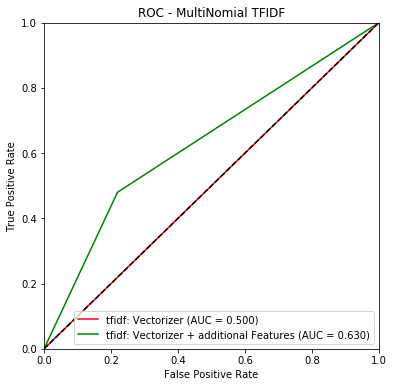

In [44]:
tfidf_fpr, tfidf_tpr, tfidf_thresholds = roc_curve(y_val_val, y_pred)
tfidf_auc = auc(tfidf_fpr, tfidf_tpr)

tfidf_add_fpr, tfidf_add_tpr, tfidf_add_thresholds = roc_curve(y_val_val, y_pred_add)
tfidf_add_auc = auc(tfidf_add_fpr, tfidf_add_tpr)

plt.plot(tfidf_fpr, tfidf_tpr, color = 'r', label = "tfidf: Vectorizer" + ' (AUC = %0.3f)' % tfidf_auc)
plt.plot(tfidf_add_fpr, tfidf_add_tpr, color = 'g', label = "tfidf: Vectorizer + additional Features" + ' (AUC = %0.3f)' % tfidf_add_auc)



plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - MultiNomial TFIDF')
plt.legend(loc="lower right")

### AP Eval

In [45]:
print (" AP for TFIDF just Vectorizer")
print (average_precision_score(y_val_val, y_pred))
print (" \n")
print (" AP for TFIDF Vectorizer + additionals")
print (average_precision_score(y_val_val, y_pred_add))

 AP for TFIDF just Vectorizer
0.101564675093268
 

 AP for TFIDF Vectorizer + additionals
0.14798639008619668


# IMBALANCE - upsampling and SMOTE

## To Do: 
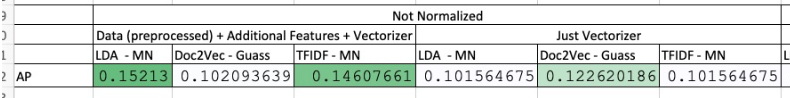

In [46]:
#over sampling
from scipy import sparse
from sklearn.utils import resample

def oversampling(X_train,y_train):
    
    genuine = []
    fake = []
    for idx,label in enumerate(y_train):
        if label == 1:
            fake.append(idx)
        else:
            genuine.append(idx)
            
    X = sparse.hstack((X_train,y_train[:,None]))
    
    fake_X = X.tocsr()[fake,:]
    genuine_X = X.tocsr()[genuine,:]
    
    # upsample minority
    fake_upsampled = resample(fake_X,
                          replace=True, # sample with replacement
                          n_samples=genuine_X.shape[0], # match number in majority class
                          random_state=27) # reproducible results
    
    X_upsampled = sparse.vstack((fake_upsampled,genuine_X))
    
    np.random.seed(27)
    index = np.arange(X_upsampled.shape[0])
    np.random.shuffle(index)
    X_upsampled = X_upsampled[index, :]
    
    X_train_upsampled = X_upsampled.T[:-1].T
    y_train_upsampled = X_upsampled.T[-1].T
    
    fake_count = y_train_upsampled.sum()
    genuine_count = y_train_upsampled.shape[0] - fake_count
    
    print("Genuine reviews: {}\nFake reviews: {}".format(genuine_count,fake_count))

    return X_train_upsampled, y_train_upsampled.A 

In [47]:
from imblearn.over_sampling import SMOTE

#played around with ratios, didnt see a difference
sm = SMOTE(random_state=2020, sampling_strategy= 'auto')

# X_train_Tfidf_SMOTE, y_train_Tfidf_SMOTE = sm.fit_sample(X_train_binary_Tfidf,y_training_data)
# X_train_lda_SMOTE, y_train_lda_SMOTE = sm.fit_sample(lda_train,y_training_data)

Using TensorFlow backend.


# Data (preprocessed) + Additional Features + Vectorizer

## LDA - MN 

In [62]:
LDA_model_add = MultinomialNB()
LDA_model_add.fit(LDA_X_training_data.toarray(),y_training_data)
y_pred_lda = LDA_model_add.predict(LDA_X_val_data.toarray())
print("LDA with additional features")
print("Accuracy:", accuracy_score(y_val_val, y_pred_add))
print("F1:", f1_score(y_val_val, y_pred_add, average='weighted'))

LDA with additional features
Accuracy: 0.6157636839467676
F1: 0.6915113684624855


In [63]:
X_train_LDA_upsampled, y_train_LDA_upsampled = oversampling(LDA_X_training_data,y_training_data)

Genuine reviews: 225055.0
Fake reviews: 225055.0


In [64]:
LDA_model_add = MultinomialNB()
LDA_model_add.fit(X_train_LDA_upsampled, y_train_LDA_upsampled)
y_pred_lda_up = LDA_model_add.predict(LDA_X_val_data.toarray())
print("LDA with additional features")
print("Accuracy:", accuracy_score(y_val_val, y_pred_add))
print("F1:", f1_score(y_val_val, y_pred_add, average='weighted'))

LDA with additional features
Accuracy: 0.6157636839467676
F1: 0.6915113684624855


In [65]:
X_train_lda_SMOTE, y_train_lda_SMOTE = sm.fit_sample(LDA_X_training_data,y_training_data)

In [66]:
LDA_model_add = MultinomialNB()
LDA_model_add.fit(X_train_lda_SMOTE, y_train_lda_SMOTE)
y_pred_lda_smote = LDA_model_add.predict(LDA_X_val_data.toarray())
print("LDA with additional features")
print("Accuracy:", accuracy_score(y_val_val, y_pred_add))
print("F1:", f1_score(y_val_val, y_pred_add, average='weighted'))

LDA with additional features
Accuracy: 0.6157636839467676
F1: 0.6915113684624855


## TFIDF - MN

In [67]:
tfidf_model = MultinomialNB()
tfidf_model.fit(Tfidf_X_training_data, y_training_data)
y_pred_tfidf = tfidf_model.predict(Tfidf_X_val_data)
print("TFIDF with additional features")
print("Accuracy:", accuracy_score(y_val_val, y_pred_add))
print("F1:", f1_score(y_val_val, y_pred_add, average='weighted'))

TFIDF with additional features
Accuracy: 0.6157636839467676
F1: 0.6915113684624855


In [68]:
Tfidf_X_training_upsampled, y_training_upsampled = oversampling(Tfidf_X_training_data, y_training_data)

Genuine reviews: 225055.0
Fake reviews: 225055.0


In [69]:
tfidf_model = MultinomialNB()
tfidf_model.fit(Tfidf_X_training_upsampled, y_training_upsampled)
y_pred_tfidf_up = tfidf_model.predict(Tfidf_X_val_data)
print("TFIDF with additional features")
print("Accuracy:", accuracy_score(y_val_val, y_pred_add))
print("F1:", f1_score(y_val_val, y_pred_add, average='weighted'))

TFIDF with additional features
Accuracy: 0.6157636839467676
F1: 0.6915113684624855


In [70]:
Tfidf_X_training_SMOTE, y_training_SMOTE = sm.fit_sample(Tfidf_X_training_data, y_training_data)

In [71]:
tfidf_model = MultinomialNB()
tfidf_model.fit(Tfidf_X_training_SMOTE, y_training_SMOTE)
y_pred_tfidf_smote = tfidf_model.predict(Tfidf_X_val_data)
print("TFIDF with additional features")
print("Accuracy:", accuracy_score(y_val_val, y_pred_add))
print("F1:", f1_score(y_val_val, y_pred_add, average='weighted'))

TFIDF with additional features
Accuracy: 0.6157636839467676
F1: 0.6915113684624855


# Just Vectorizer

## Doc2Vec - Gauss

In [72]:
dv_model = GaussianNB()
dv_model.fit(doc2vec_train, y_training_data)
y_pred_d2v = dv_model.predict(doc2vec_val)
print("DOC2VEC with out additional features")
print("Accuracy:", accuracy_score(y_val_val, y_pred))
print("F1:", f1_score(y_val_val, y_pred, average='weighted'))

DOC2VEC with out additional features
Accuracy: 0.46146778773873826
F1: 0.5507065526807647


In [73]:
X_train_D2V_upsampled, y_train_D2V_upsampled = oversampling(doc2vec_train, y_training_data)

Genuine reviews: 225055.0
Fake reviews: 225055.0


In [74]:
dv_model = GaussianNB()
dv_model.fit(X_train_D2V_upsampled.toarray(), y_train_D2V_upsampled)
y_pred_d2v_up = dv_model.predict(doc2vec_val)
print("DOC2VEC with out additional features")
print("Accuracy:", accuracy_score(y_val_val, y_pred))
print("F1:", f1_score(y_val_val, y_pred, average='weighted'))

DOC2VEC with out additional features
Accuracy: 0.46146778773873826
F1: 0.5507065526807647


In [75]:
X_train_D2V_SMOTE, y_train_D2V_SMOTE = sm.fit_sample(doc2vec_train, y_training_data)

In [76]:
dv_model = GaussianNB()
dv_model.fit(X_train_D2V_SMOTE, y_train_D2V_SMOTE)
y_pred_d2v_smote = dv_model.predict(doc2vec_val)
print("DOC2VEC with out additional features")
print("Accuracy:", accuracy_score(y_val_val, y_pred))
print("F1:", f1_score(y_val_val, y_pred, average='weighted'))

DOC2VEC with out additional features
Accuracy: 0.46146778773873826
F1: 0.5507065526807647


# Eval

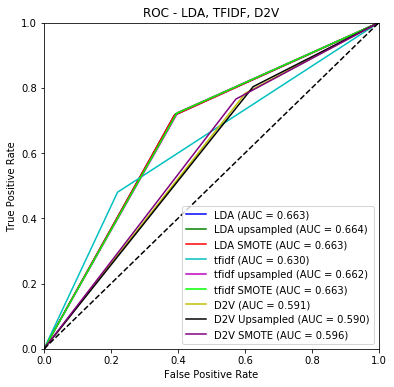

In [119]:
#LDA (reg,up,smote)
lda_fpr, lda_tpr, lda_thresholds = roc_curve(y_val_val, y_pred_lda)
lda_auc = auc(lda_fpr, lda_tpr)

lda_fpr1, lda_tpr1, lda_thresholds1 = roc_curve(y_val_val, y_pred_lda_up)
lda_auc_up = auc(lda_fpr1, lda_tpr1)

lda_fpr2, lda_tpr2, lda_thresholds2 = roc_curve(y_val_val, y_pred_lda_smote)
lda_auc_smote = auc(lda_fpr2, lda_tpr2)

#TFIDF
tfidf_fpr, tfidf_tpr, tfidf_thresholds = roc_curve(y_val_val, y_pred_tfidf)
tfidf_auc = auc(tfidf_fpr, tfidf_tpr)

tfidf_fpr1, tfidf_tpr1, tfidf_thresholds1 = roc_curve(y_val_val, y_pred_tfidf_up)
tfidf_auc_up = auc(tfidf_fpr1, tfidf_tpr1)

tfidf_fpr2, tfidf_tpr2, tfidf_thresholds2 = roc_curve(y_val_val, y_pred_tfidf_smote)
tfidf_auc_smote = auc(tfidf_fpr2, tfidf_tpr2)

#D2V
d2v_fpr, d2v_tpr, d2v_thresholds = roc_curve(y_val_val, y_pred_d2v)
d2v_auc = auc(d2v_fpr, d2v_tpr)

d2v_fpr1, d2v_tpr1, d2v_thresholds1 = roc_curve(y_val_val, y_pred_d2v_up)
d2v_auc_up = auc(d2v_fpr1, d2v_tpr1)

d2v_fpr2, d2v_tpr2, d2v_thresholds2 = roc_curve(y_val_val, y_pred_d2v_smote)
d2v_auc_smote = auc(d2v_fpr2, d2v_tpr2)

plt.plot(lda_fpr, lda_tpr, color = 'b', label = "LDA" + ' (AUC = %0.3f)' % lda_auc)
plt.plot(lda_fpr1, lda_tpr1, color = 'g', label = "LDA upsampled" + ' (AUC = %0.3f)' % lda_auc_up)
plt.plot(lda_fpr2, lda_tpr2, color = 'r', label = "LDA SMOTE" + ' (AUC = %0.3f)' % lda_auc_smote)

plt.plot(tfidf_fpr, tfidf_tpr, color = 'c', label = "tfidf" + ' (AUC = %0.3f)' % tfidf_auc)
plt.plot(tfidf_fpr1, tfidf_tpr1, color = 'm', label = "tfidf upsampled" + ' (AUC = %0.3f)' % tfidf_auc_up)
plt.plot(tfidf_fpr2, tfidf_tpr2, color = 'lime', label = "tfidf SMOTE" + ' (AUC = %0.3f)' % tfidf_auc_smote)

plt.plot(d2v_fpr, d2v_tpr, color = 'y', label = "D2V" + ' (AUC = %0.3f)' % d2v_auc)
plt.plot(d2v_fpr1, d2v_tpr1, color = 'k', label = "D2V Upsampled" + ' (AUC = %0.3f)' % d2v_auc_up)
plt.plot(d2v_fpr2, d2v_tpr2, color = 'purple', label = "D2V SMOTE" + ' (AUC = %0.3f)' % d2v_auc_smote)


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - LDA, TFIDF, D2V')
plt.legend(loc="lower right")

In [95]:
y_pred_list = [y_pred_lda,y_pred_lda_up,y_pred_lda_smote, 
               y_pred_tfidf,y_pred_tfidf_up,y_pred_tfidf_smote,
              y_pred_d2v,y_pred_d2v_up,y_pred_d2v_smote]
print (" AP for Doc2Vec just Vectorizer")
print (average_precision_score(y_val_val, y_pred_lda))
print (" \n")
print (" AP for Doc2Vec Vectorizer + additionals")
print (average_precision_score(y_val_val, y_pred_add))
print (" \n")
print (" AP for Doc2Vec NormalizedVectorizer")
print (average_precision_score(y_val_val, y_pred_norm))

 AP for Doc2Vec just Vectorizer
0.15212879966422246
 

 AP for Doc2Vec Vectorizer + additionals
0.15155967644403706
 

 AP for Doc2Vec NormalizedVectorizer
0.101564675093268


In [103]:
len(y_pred_list)
# 0 1 2
# 3 4 5
# 6 7 8

9

In [105]:
ap_lda = []
ap_tfidf = []
ap_d2v = []

for pred in range(len(y_pred_list)):
    ap = average_precision_score(y_val_val, y_pred_list[pred])
    if pred <= 2:
        ap_lda.append(ap)
    elif pred >= 6:
        ap_d2v.append(ap)
    else:
        ap_tfidf.append(ap)

In [106]:
ap_lda

[0.15212879966422246, 0.1521687661654886, 0.15214197557860995]

In [107]:
ap_tfidf

[0.14798639008619668, 0.1512084308795889, 0.15155967644403706]

In [117]:
ap_df = pd.DataFrame([ap_lda,ap_tfidf,ap_d2v], columns = ['regular','upsampled','SMOTE'], index = ['LDA','TFIDF','D2V'])

In [118]:
ap_df

,regular,upsampled,SMOTE
LDA,0.152129,0.152169,0.152142
TFIDF,0.147986,0.151208,0.151560
D2V,0.122620,0.122006,0.124288
